# Machine Learning using Python

This session will be accompanied with a slide deck, where I will discuss the basic concepts of ML, how to approach it. In short, in ML, we try to fit a model to our data, mostly to predict something we are interested in predicting. The challenge of ML is that there are many model and model fitting approaches out there in the world, and its important to know which one is the right fit and is capable to predicting the variable we are interested in. This challenge in further exacerbated by the fact that there is no golden rule - that is there is no theory or rule that can help us chose a certain model which will consistently be the right fit for the data we have in hand, and for the variable we want to predict. We can look at some statistical modeling theories to get an idea of when a nature of model can give me accurate predictions, but it is important to try multiple models before we land on chosing one. This makes ML very computation heavy

Another very important aspect of ML is that it focuses on prediction accuracy, at times if needed by sacrificing explainability. This means that in ML, the sole objective of the algorithm is to give us a model that is best at predicting our target variable. This creates 2 problems:
1. Overfitting
2. Loss of simplicity and explainability

Overfitting - suppose we have a dataset which has a customers spending and also some data on customers demography and income informtation, for a grocery store. Our target variable is to predict a customers spending amount. In order to do so we can use the data we have, other than the spending amount, to fit a model where the model predicts the spending amount. The objective of the ML algorith will be to take all the demographic and income inputs and then predict a spending amount which is closest to the real spending amount present in our data. The logic is, if our model is good at predicting the spending amount in the data we already have, then it would be also good at predicting the spending amount of other customers if we enter their details. But, this is where the overfitting issue comes up. What if, the data we have on spendinng of customers and their other details, have some special customers (or we can call them outliers), whose behavior influences our model fitting. In that case, our model might not be very accurate when new data is coming up, as the new data might not have the outliers as the old data.

There is one way of fixing this. Its called train-test splitting, and the concept is very simple. Instead of using all the data we have at hand to fit the model to predict spending amount, we use randomly 70% of the data to fit the model. We call these 70% subset - the train set. We call it Train because we use it to Train our model. We keep the rest 30% of the data separate, and never use it to train any of our ML models. The beauty of this approach is that it allows us to Test our models performance on some data it never had the chance to look into. So the 30% of the data we call Train set. The Train data acts exactly as a new data that the model will encounter when we use it to predict the spending amount of someone. But the Test set also has the original spending amount, that the model dont know (beceuase it was trained on the Train set), but we know. So we can ask the model to make its predictions based on the test set, and then check its predictions with the real life sending data. We can create statistical calculations of error/accuracy such as RMSE - Root Mean Squared Error. And then we can use the RMSE to compare multiple models and decide which one is best for prediction.

In advanced ML, there are other approaches such as Cross Validation, which uses the same concept of Train Test Splitting to make sure further that there is no overfitting going on, but for the starter, I think Train/Test splitting does a tremendous job

Loss of Simplicity and Explainability - Since the goal of ML models is to make the most accurate prediction, at times the model just gets overly complex and becomes a blackbox. Which means we cannot really pry open the components of a model that well to understand calculations (especially if we are not very hardcore statisticians). But we can rely on the model to make a prediction. This is the case where if we want to know (from the above example), what causes spending to increase the most, would be hard to understand from the model. This is where we have some tools in statistics which are stored as libraries in Python which we can use to give us some understanding of the ML Model. But in truth we have to understand that the goal of ML is not in telling us causality (that is what Econometrics is for) but the goal is to predict stuff accurately.

So let this be the theory primer for our ML session!

In Python, the single most powerful and efficient library to work with ML is Sickit Learn, and we are going to start loading the needed libraries to start working with ML in the following section

### Installing and Loading Libraries, and Loading data

The library we will work with is Sickit Learn and lets start by installing the library (most likely it is alredy in the python libraries that Anaconda has downloaded for you)

In [1]:
# Installing sickit learn
import sys
!{sys.executable} -m pip install sklearn

Now lets start by loading our data:

In [2]:
# Loading Pandas and Numpy
import pandas as pd
import numpy as np

# Reading the data using pandas
dm = pd.read_csv("/Users/muhammadsaqifulalam/Dropbox/My Mac (FVFD1URVP3XY)/Desktop/DirectMarketing.csv")

# To check if we have loaded dm properly
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


### Creating our first simple model

In the start of this session we talked about the problem of overfitting, and how we can avoid it using Train-Test Splitting. But before we do that, lets just create a model based on our full data, to get a feel of how we create models using Sickit Learn. We will fit a regression model to predict Spending Amount of our customers based on all the other columns of information we have. To do so, first we divde the dataset in to Y (our target variable) and X (variables which we use to predict Y)

In [3]:
# Creating an object Y with our target variable
Y = dm["AmountSpent"]

# Creating another object X with predictor variables (we do this by dropping Y)
X = dm.drop("AmountSpent", axis = 1)

# Checking X
X.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
0,Old,Female,Own,Single,Far,47500,0,High,6
1,Middle,Male,Rent,Single,Close,63600,0,High,6
2,Young,Female,Rent,Single,Close,13500,0,Low,18
3,Middle,Male,Own,Married,Close,85600,1,High,18
4,Middle,Female,Own,Single,Close,68400,0,High,12


One of the issues with the X dataset is that there are a lot of non_numeric variables, and we would need to convert them to dummy variables using a one hot encoding function in Pandas

In [4]:
# To create the dummy dataset
X_dummies = pd.get_dummies(X)

# Checking the dummy dataset
X_dummies.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0


Now we will be building our simple model of prediction and checking for accuracy of the model. The way to do so is by a simple process of:
1. First we define the model we want to build
2. We fit the model
3. We make the predictions
4. We evaluate the models accuracy

To start, lets load the sublibrary in sklearn that can give us the code for running regression

In [5]:
from sklearn.linear_model import LinearRegression

# Then we can create a regression object by loading the regression function (step 1 = defining the model)
regr_model = LinearRegression()

# Next we fit the model - Step 2
regr_model.fit(X_dummies, Y)

LinearRegression()

This is not the output we were expecting! The problem with the sickit learn is that its focused only on ML models, and on fitting the most accurate model. So does not make it easy to get the results of regression nicely presented as we saw in the last lesson in statsmodels. But we can start by looking at the predictions of the model

In [6]:
# The predictions we will be making are for the first 5 houses in the dm
print(dm.head())

# To generage the prediction of the first 5 hours, we will enter the first 5 rows of X_dummy data
regr_model.predict(X_dummies.head())

      Age  Gender OwnHome  Married Location  Salary  Children History  \
0     Old  Female     Own   Single      Far   47500         0    High   
1  Middle    Male    Rent   Single    Close   63600         0    High   
2   Young  Female    Rent   Single    Close   13500         0     Low   
3  Middle    Male     Own  Married    Close   85600         1    High   
4  Middle  Female     Own   Single    Close   68400         0    High   

   Catalogs  AmountSpent  
0         6          755  
1         6         1318  
2        18          296  
3        18         2436  
4        12         1304  


array([1410.26189713, 1155.9369709 ,  399.25612336, 1902.00150227,
       1562.96025742])

As we can see, some of the preidctions have been pretty far off, some pretty accurate. But that is with all data and models, a model can at best be a close approximation of real life, it cannot be 100% accurate. Lets see how we can get the accuracy scores. To get these metrics easily, we will rely on another library from sklear, metrics

In [7]:
# First we load the metrics library
import sklearn.metrics as metrics

# Next we will need to get the real value of spending amount and predicted value of spending amount
# The real value is already stored in Y, just need to get the predicted value
Y_pred = regr_model.predict(X_dummies)

print("r square : ", metrics.r2_score(Y, Y_pred))
print("MSE : ", metrics.mean_squared_error(Y, Y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y, Y_pred)))

r square :  0.7476389142457088
MSE :  232860.94910345174
RMSE :  482.55667967965354


If you remember, we introduced the concept of overfitting. So the RMSE and r square are based on the whole data, so the results will have overfitting involved in them. So let us look at how we can do the Train Test splitting in sklearn, and use the train and test sets to check for more reliable model performance metrics

In [8]:
# First we will load the train test split sub-library in sklearn
from sklearn.model_selection import train_test_split

# Now we will be creating a test and train set
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3)


In [9]:
# Now lets check what we have created
train_X

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
163,Middle,Male,Own,Single,Far,59600,2,Medium,18
136,Young,Female,Own,Single,Far,21400,3,NaN,6
717,Middle,Female,Rent,Single,Far,44100,1,Medium,18
773,Young,Female,Rent,Married,Close,36500,1,NaN,18
469,Old,Female,Own,Married,Far,78900,0,High,18
...,...,...,...,...,...,...,...,...,...
697,Middle,Female,Own,Single,Far,52600,2,Medium,12
909,Middle,Female,Rent,Married,Close,63500,1,Medium,18
892,Old,Female,Own,Married,Far,74900,0,NaN,12
254,Old,Male,Own,Single,Close,65300,0,High,18


In [10]:
test_X

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
98,Middle,Male,Own,Married,Close,81200,0,High,24
393,Young,Male,Rent,Single,Close,25000,0,Low,6
686,Old,Male,Own,Married,Close,84500,0,NaN,12
56,Middle,Male,Own,Single,Close,60300,0,High,24
476,Young,Female,Rent,Single,Close,12000,0,Low,6
...,...,...,...,...,...,...,...,...,...
427,Young,Male,Rent,Single,Close,14200,0,Low,6
993,Middle,Female,Own,Married,Far,99200,0,High,24
545,Middle,Female,Rent,Single,Close,42000,3,Low,18
268,Young,Female,Rent,Single,Close,13400,1,Low,12


So we have created the two datasets, test and train. Now the next steps will be to:
1. Define the model
2. Fit the model on the Train Data
3. Predict spending amount on the test data
4. Evaluate the model

First lets create the dummy variable datasets for train and test X datasets

In [11]:
train_X_dummy = pd.get_dummies(train_X)

# To check whether this worked
train_X_dummy.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
163,59600,2,18,1,0,0,0,1,1,0,0,1,0,1,0,0,1
136,21400,3,6,0,0,1,1,0,1,0,0,1,0,1,0,0,0
717,44100,1,18,1,0,0,1,0,0,1,0,1,0,1,0,0,1
773,36500,1,18,0,0,1,1,0,0,1,1,0,1,0,0,0,0
469,78900,0,18,0,1,0,1,0,1,0,1,0,0,1,1,0,0


In [12]:
# Similarly the same thing for the test set
test_X_dummy = pd.get_dummies(test_X)

# checking
test_X_dummy.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
98,81200,0,24,1,0,0,0,1,1,0,1,0,1,0,1,0,0
393,25000,0,6,0,0,1,0,1,0,1,0,1,1,0,0,1,0
686,84500,0,12,0,1,0,0,1,1,0,1,0,1,0,0,0,0
56,60300,0,24,1,0,0,0,1,1,0,0,1,1,0,1,0,0
476,12000,0,6,0,0,1,1,0,0,1,0,1,1,0,0,1,0


In [13]:
# Now we define the model
rm1 = LinearRegression()

# Fitting the model to train data
rm1.fit(train_X_dummy, train_Y)

# Generating prediction for the first 5 customers in the test set
print(test_X.head())
print(test_Y.head())
print(rm1.predict(test_X_dummy.head()))

        Age  Gender OwnHome  Married Location  Salary  Children History  \
98   Middle    Male     Own  Married    Close   81200         0    High   
393   Young    Male    Rent   Single    Close   25000         0     Low   
686     Old    Male     Own  Married    Close   84500         0     NaN   
56   Middle    Male     Own   Single    Close   60300         0    High   
476   Young  Female    Rent   Single    Close   12000         0     Low   

     Catalogs  
98         24  
393         6  
686        12  
56         24  
476         6  
98     1856
393     264
686    1557
56     1263
476     140
Name: AmountSpent, dtype: int64
[2243.57212133  111.01991321 1884.19424642 1894.83155373 -153.31718057]


As you can see, the errors in the prediction have increased, as the model never saw these test data to fit itself on in the first place. To check how the model performs with an unknown dataset overall, we can get the model metrics based on the predicted amount spent and real amount spent from the test datasets

In [14]:
# First, getting the predicted amount spent for the test dataset
Y_test_pred = rm1.predict(test_X_dummy)

# Next, printing our evaluation metrics
print("r square : ", metrics.r2_score(test_Y, Y_test_pred))
print("MSE : ", metrics.mean_squared_error(test_Y, Y_test_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(test_Y, Y_test_pred)))

r square :  0.7293965656415429
MSE :  241299.43803837255
RMSE :  491.22239162966963


You can see that the R square has gone down, the RMSE have gone up, suggesting that we have overfitting in the full dataset, which has been tackled by our train test splitting

But the thing is, the models are still blackboxes. We have known about their accuracy, but can we know more about the models we have?

### ML Explainability

Although we mentioned that ML models are blackboxes, there are few ways we can undestand what variables contribute to the predictive power of a model and which variables are not very useful. This can help us identify which variables we could work on, if we had the capability

For our Grocery shop example, besides being able to predict the spending amount, it would be very helpful for the management to know which variables matter the most for prediction.

For this, we will use the concept of permutation importance. In permutation importance, the model which we have fitted for prediction is given random values based on a permutation combination of different variables. So basically the idea is that, we take away one variable and replace it with random noise, and then see how much the accuracy and explainability of the model have changed. From there we get a calculation which helps us rank the most important variable as the top most, and the least important as the bottom most

To do so, we will be using PermulationImportance sublibrary from the eli5 library

In [15]:
# Making sure that we have eli5 library - by re-installing it!
!{sys.executable} -m pip install eli5

In [16]:
# Now we import the function we need from eli5
import eli5
from eli5.sklearn import PermutationImportance

# next, we creat our Permutation Importance score using the library, for the regression model we have created
perm = PermutationImportance(rm1).fit(train_X_dummy, train_Y)

# do note that we are using the train dataset. This is because its important to understand how our model is being 
# affected by the data we used to train the model

# Now we print out the importance values, also knowns as weights
eli5.show_weights(perm, feature_names = train_X_dummy.columns.tolist())

Weight,Feature
0.7950 ± 0.0812,Salary
0.1565 ± 0.0233,Catalogs
0.0499 ± 0.0163,Children
0.0470 ± 0.0143,History_Medium
0.0357 ± 0.0087,History_Low
0.0188 ± 0.0055,Location_Far
0.0187 ± 0.0057,Location_Close
0.0020 ± 0.0024,Age_Middle
0.0018 ± 0.0002,History_High
0.0014 ± 0.0024,Age_Old


Lets take a moment to dissect the table. The 5 top most important variables affecting the prediciton of spending amount of a customer is:
1. Salary (no surprise there, the more you earch , the more you spend)
2. Catalogs - this tells us that money spend on email and phone advertisement is justified
3. History (Low and Medium) - this means that frequency of people coming, especially those that are not that regular, plays a major role in deciding how much the customer will spend
4. Number of Children - Again, prety self explanatory
5. Location (close and far) - distance from the shop - something we expect

Permutation Importance is a very powerful tool in helping us understand the black box of any ML model. To be honest, regression is not a blackbox, and regression results can be interpreted, as we saw in the previous session. But, this applies to ALL machine learning, some of which will be very hard to interpret other wise

Another approach to understand what led to a certain prediction value is the use of Shapley values. Shapley value is a game-theoretic approach to undestand contribution of a prediction, and the mathematics and the detailed theory is beyond the scope of this tutorial. But to put it in simple terms, a shapley value tells us that why a prediction value is high or low, and what lead to the increase or decrease. Lets see how we can get a shapley graph for one of our predictions from our linear model

Again we will start by installing the shap library

In [17]:
# Installing Shap
!{sys.executable} -m pip install shap

In [18]:
# No we chose one row to predict
data_for_prediction = test_X.iloc[1, :]

# import the shap library
import shap

# Create an object that will be the shapley value calculator
explainer = shap.Explainer(rm1.predict, test_X_dummy)

# And then calculate our shapley values
shap_values = explainer(test_X_dummy)

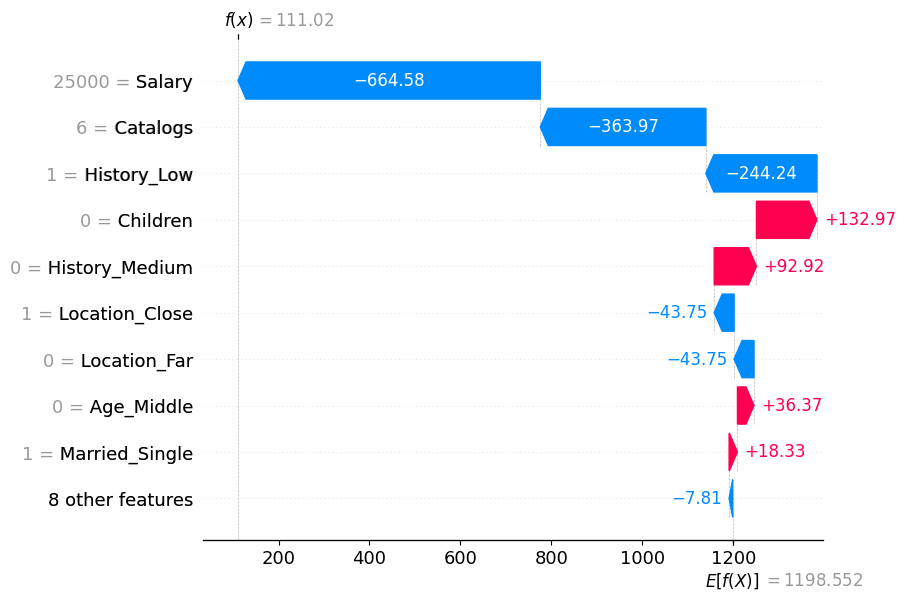

In [19]:
shap.plots.waterfall(shap_values[1])

In [20]:
  rm1.predict(test_X_dummy)[1]

111.01991320652496

The diagram shows that predcition of the model for this customer was 111 BDT. The average customer spends 1198 BDT, but this person spent 660 BDT less because his salary was low (25,000), number of catalogs ge got was 6 (so he spend 363 BDT les), then he also spent 244 BDT less because his History freq is low. Now, since he does not have a children so the value increases by 133 BDT. This is how we read the shapley breakdown of the prediction, tells what which features contributed to lower values and which features contributed to higher values

Next, lets look into another model - Tree models!

### Tree Based Models

Regression algorithms have one approach to fitting models. Tree based methods take another approach. What they do is try to break down the data by a column which maximizes the explanaiton of variance of the target variable, then they attempt to break the data down into further columns, untill all the variation in the target variable can be properly allocated to all the variables. Seems a little vague in this description, but that is why it is good if we go through a demonstration with our spending data of the grocery shop

We already have the train X dummy dataset, train Y dataset, test X dummy dataset and test Y dataset. So, we can go directly to the model

In [29]:
# First we will load our tree model called deicsion tree regressor
from sklearn.tree import DecisionTreeRegressor

# Next we create the tree model object
tree_model = DecisionTreeRegressor(max_depth = 3)
# The max depth tells the algorithm to stop divididing after choosing 3 features (columns)

# Now we fit the model
tree_model.fit(train_X_dummy, train_Y)

DecisionTreeRegressor(max_depth=3)

A good idea here is to visualize the tree to understand what the model is doing

[Text(0.5, 0.875, 'Salary <= 67650.0\nsquared_error = 936009.569\nsamples = 700\nvalue = 1218.831'),
 Text(0.25, 0.625, 'Salary <= 40050.0\nsquared_error = 305326.892\nsamples = 466\nvalue = 799.689'),
 Text(0.125, 0.375, 'Salary <= 26650.0\nsquared_error = 93803.606\nsamples = 244\nvalue = 477.795'),
 Text(0.0625, 0.125, 'squared_error = 34318.82\nsamples = 161\nvalue = 352.919'),
 Text(0.1875, 0.125, 'squared_error = 120266.313\nsamples = 83\nvalue = 720.024'),
 Text(0.375, 0.375, 'Catalogs <= 15.0\nsquared_error = 298758.556\nsamples = 222\nvalue = 1153.482'),
 Text(0.3125, 0.125, 'squared_error = 151571.287\nsamples = 109\nvalue = 897.404'),
 Text(0.4375, 0.125, 'squared_error = 316465.117\nsamples = 113\nvalue = 1400.496'),
 Text(0.75, 0.625, 'Catalogs <= 15.0\nsquared_error = 1145396.3\nsamples = 234\nvalue = 2053.534'),
 Text(0.625, 0.375, 'History_Low <= 0.5\nsquared_error = 610484.25\nsamples = 98\nvalue = 1427.5'),
 Text(0.5625, 0.125, 'squared_error = 519755.442\nsamples = 8

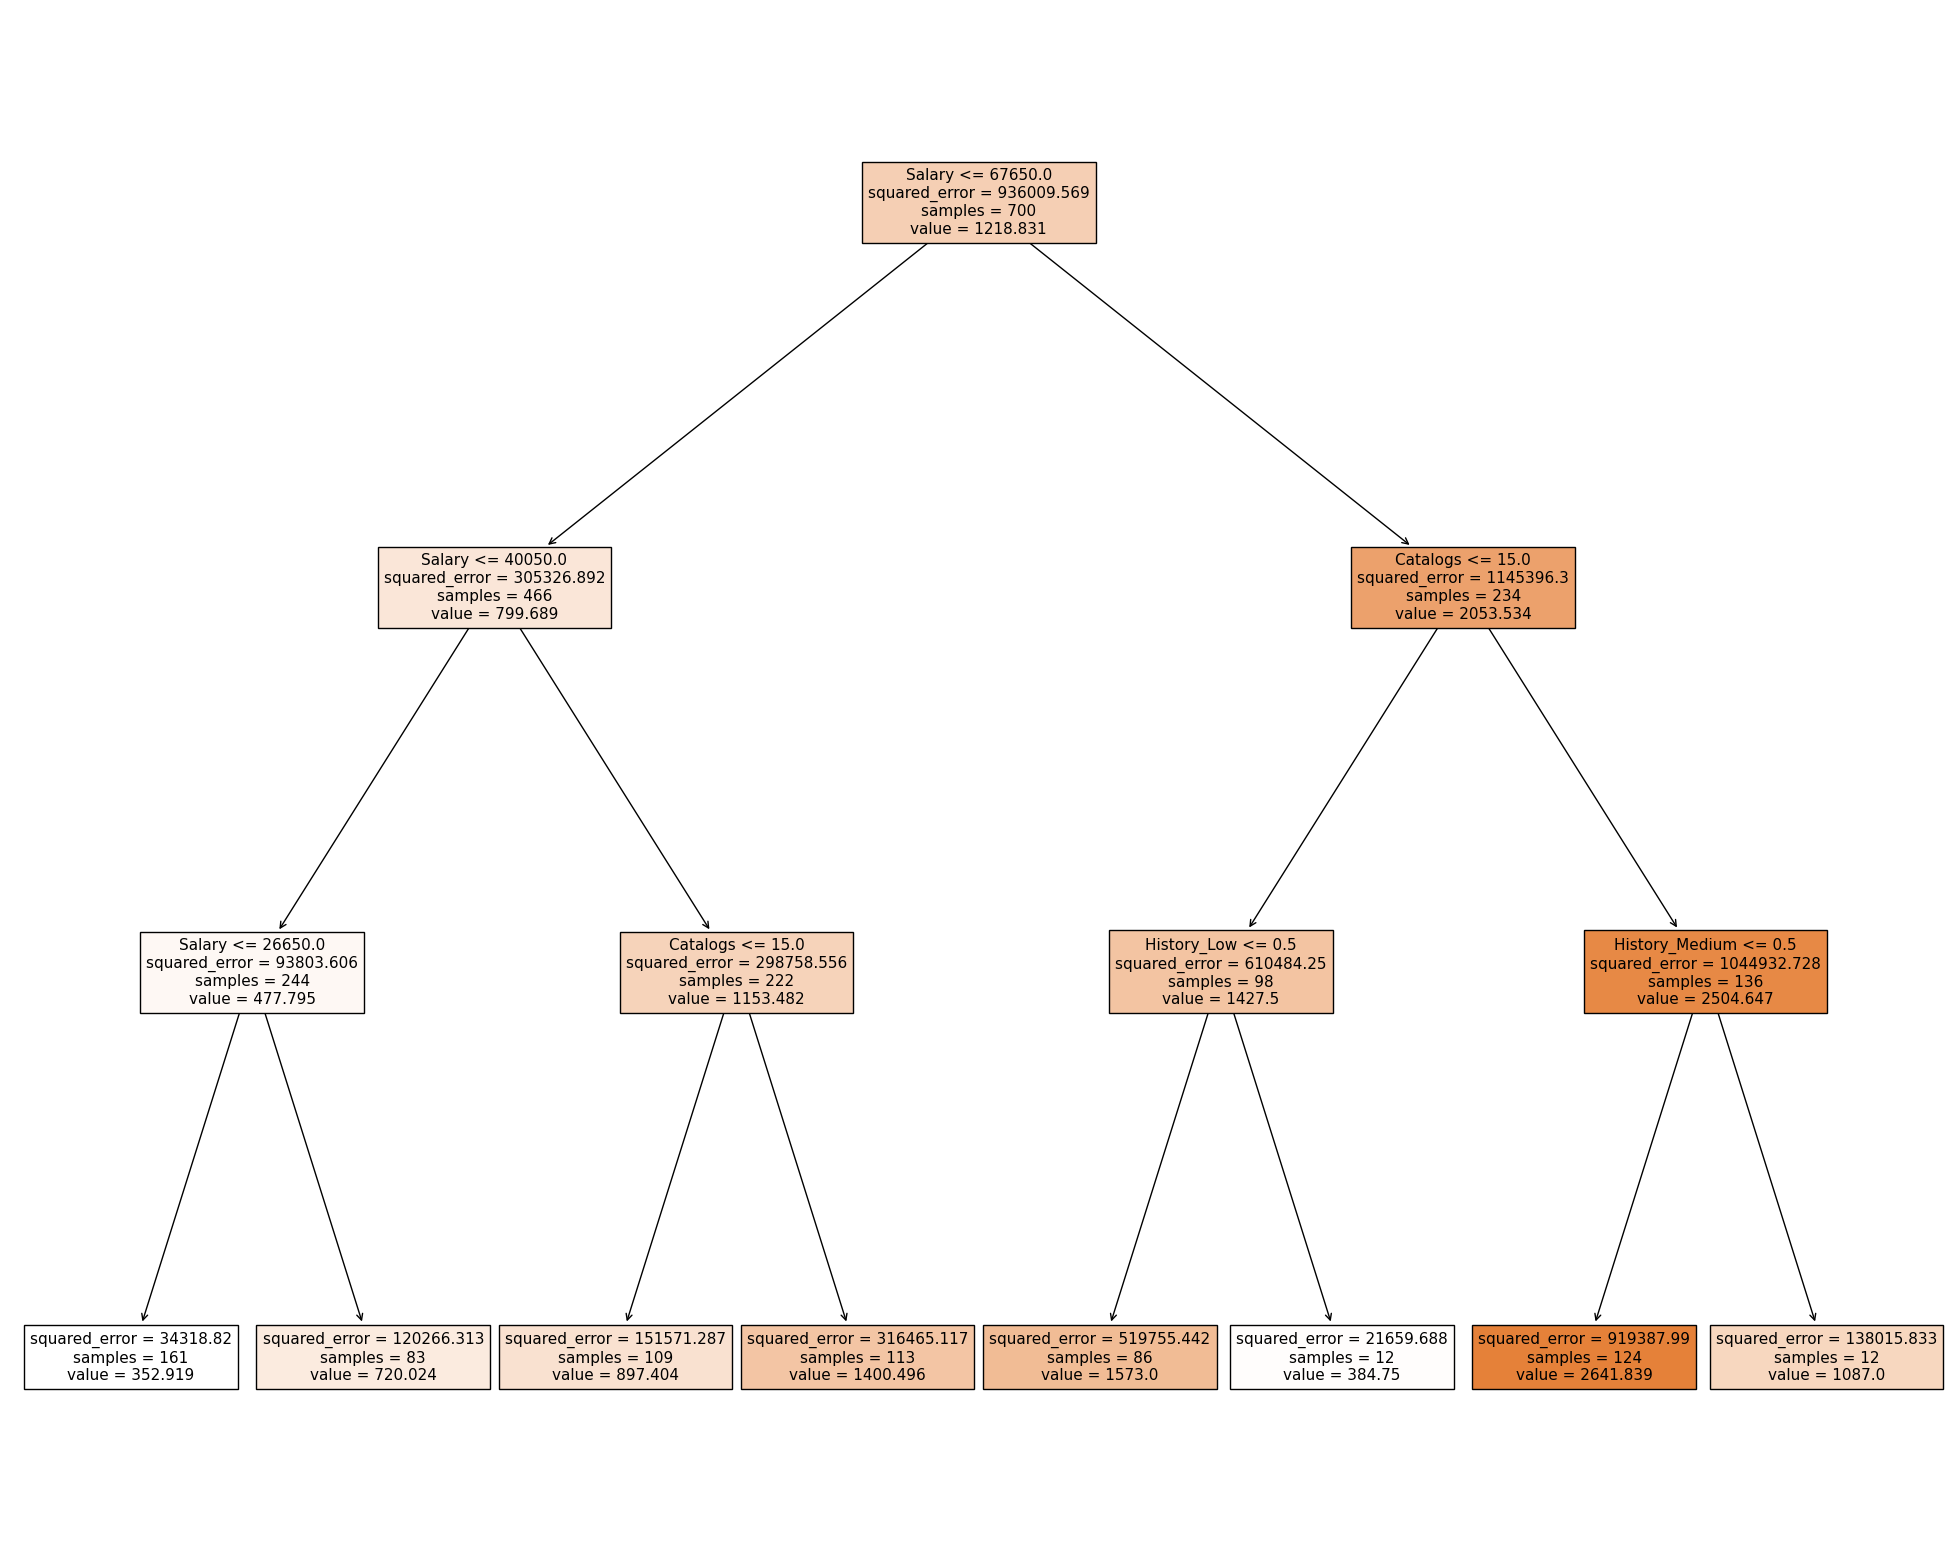

In [34]:
# First we load the plotting library in python
import matplotlib.pyplot as plt
from sklearn import tree

# Now we plot the tree
plt.figure(figsize = (25,20))  
tree.plot_tree(tree_model, feature_names = train_X_dummy.columns, filled = True)

Now lets try to explain this model a bit. So the first feature(column) that the algorithm thinks to be most relevant for segregating the amount spent is Saalry. Dividing people intp two groups, those with Salary higher than 67650, we then check the number of catalogs they have received. If the number of Catalogs is greater than 15, then we check whehther the History_Medium is less than 0.5 (which means if the History Medium is 0, which also means that the either the customer is coming low times or high freq times). If yes, then the expected spending mount should be 2640 BDT. This is the way we can interpret all the leafs of the tree.

In [36]:
# Now lets see the prediction of the first 5 entries
print(test_X.head())
print(test_Y.head())

print(tree_model.predict(test_X_dummy.head()))

        Age  Gender OwnHome  Married Location  Salary  Children History  \
98   Middle    Male     Own  Married    Close   81200         0    High   
393   Young    Male    Rent   Single    Close   25000         0     Low   
686     Old    Male     Own  Married    Close   84500         0     NaN   
56   Middle    Male     Own   Single    Close   60300         0    High   
476   Young  Female    Rent   Single    Close   12000         0     Low   

     Catalogs  
98         24  
393         6  
686        12  
56         24  
476         6  
98     1856
393     264
686    1557
56     1263
476     140
Name: AmountSpent, dtype: int64
[2641.83870968  352.91925466 1573.         1400.49557522  352.91925466]


And to evaluate the accuracy of the tree model

In [37]:
# First, getting the predicted amount spent for the test dataset
Y_test_pred_tree = tree_model.predict(test_X_dummy)

# Next, printing our evaluation metrics
print("r square : ", metrics.r2_score(test_Y, Y_test_pred_tree))
print("MSE : ", metrics.mean_squared_error(test_Y, Y_test_pred_tree))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(test_Y, Y_test_pred_tree)))

r square :  0.5697613457037874
MSE :  383647.55329210096
RMSE :  619.3928908956746


The metrics of the model on the test set confimrs that the tree model did not perform as good as the linear model. 

This conlcudes our section for introduction of ML models. Do note that there are many ML models out there, but we can evaluate most of them with sklearn using the following steps:
1. Identify the model you want to use, and load the model
2. Create the model object
3. Fit the model
4. Predict using the model
5. Evaluate model metrics

If you see that the model is a good fit, then one extra step of suggestion is - carry out the permutation importance to gain some idea of which variables (columns) are contributing to the prediction, and get a shapley distribution of the prediction.

By now you should be familiar with Python codes, so the world of python is open to you - go PLAY!